SECTION 1: Initial Model Training and Evaluation

In [2]:
import pickle

# Load X_train, X_test, y_train, y_test from disk
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

# Verify data by checking its head or shape
print(X_train.head())
print(X_train.shape, y_train.shape)

      customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
5557  6918-UMQCG       0              0        0           0 -1.114728   
2270  4140-MUHUG       0              1        0           0 -1.195884   
6930  5570-PTWEH       0              0        1           0 -1.195884   
2257  2054-PJOCK       0              0        0           0  1.117066   
898   4315-MURBD       0              0        0           0 -0.830682   

      PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
5557             1                 0        0.504286     -0.836504  ...   
2270             1                 1        0.724189     -0.907742  ...   
6930             1                 1        0.337292     -0.909574  ...   
2257             1                 0        0.515860      1.110332  ...   
898              1                 1        1.122660     -0.515129  ...   

      TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
5557            False        

In [4]:
# Drop the CustomerID column
X_train = X_train.drop(columns=['customerID'])
X_test = X_test.drop(columns=['customerID'])

Accuracy:  0.8092759110269758
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



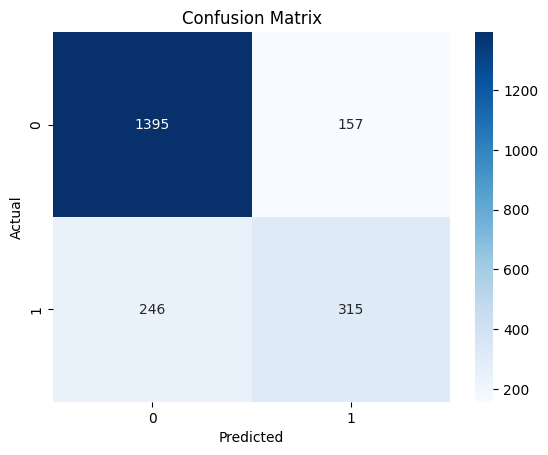

In [6]:
from sklearn.linear_model import LogisticRegression
# Initialize and fit model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make Predictions
y_pred = log_reg_model.predict(X_test)

#  Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Section 2: Applying SMOTE to the Training Data

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

#Apply SMOTE to X_train and y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [11]:
# Check the new class Distribution
print('Class distribution after SMOTE:')
print(y_train_smote.value_counts())

Class distribution after SMOTE:
Churn
0    3622
1    3622
Name: count, dtype: int64


Section 3: Retrain the Model with Balanced Data

Accuracy after SMOTE: 0.7491717936583058
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1552
           1       0.52      0.72      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



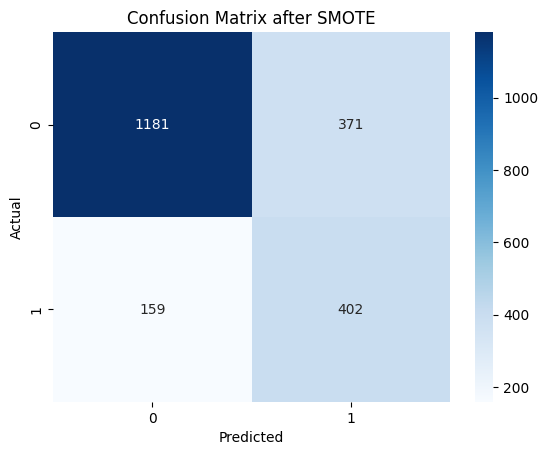

In [12]:
# Initialize and fit the model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_smote, y_train_smote)

# Make Predictions
y_pred_smote = log_reg_model.predict(X_test)

#Evaluate Model
print('Accuracy after SMOTE:', accuracy_score(y_test, y_pred_smote))
print('Classification Report after SMOTE:\n', classification_report(y_test, y_pred_smote))

# Visualize Updated Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix after SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

So we can see that using SMOTE, we were able to increase recall for the churn class from .56 to .72, which is a nice jump and means the model is now catching more true churn cases.

However, every other metric has pretty much decreased. The model now has more false positives than before, and is correctly catching non churn cases even less. 

In [13]:
# Exporting smote data to RandomForestModel notebook
# Save X_train_smote to a pickle file
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/X_train_smote.pkl', 'wb') as file:
    pickle.dump(X_train_smote, file)

# Save y_train_smote to a pickle file
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/y_train_smote.pkl', 'wb') as file:
    pickle.dump(y_train_smote, file)